In [9]:
# Import necessary libraries
import pandas as pd
import sqlite3
from sqlite3 import Error
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data files from Part 1 and Part 2. 
# The data retrieved from Foursquare is redundant as the same data was taken from the Yelp API. Therefore, only the CityBikes and Yelp data will be merged
city_bikes_data = pd.read_csv('/Users/kthan/Desktop/LHL-Python/Python-Project/data/city_bikes_data.csv') 
foursquare_data = pd.read_csv('/Users/kthan/Desktop/LHL-Python/Python-Project/data/foursquare_data.csv')
yelp_data = pd.read_csv('/Users/kthan/Desktop/LHL-Python/Python-Project/data/yelp_data.csv')

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [4]:
# Join the data using Pandas merge function
data = pd.merge(yelp_data, city_bikes_data, how='inner', left_on=['Bike Station Lon', 'Bike Station Lat'], right_on=['Longitude', 'Latitude'])
data.head(2)

,Restaurant Name,Category Name,Latitude_x,Longitude_x,Distance,Rating,Number of Reviews,Price Point,Bike Station Lat,Bike Station Lon,Station Name,Latitude_y,Longitude_y,Number of Bikes
0,Jaclyn's,caribbean,43.66627,-79.31802,172.375134,4.5,16,no data,43.665269,-79.319796,Queen St E / Woodward Ave,43.665269,-79.319796,7
1,Lake Inez,bars,43.67234,-79.32064,794.661955,4.5,94,$$$,43.665269,-79.319796,Queen St E / Woodward Ave,43.665269,-79.319796,7


In [5]:
# Before beginning the cleaning process, save the dataframe as an excel file 
# Then, store it in the project's data folder
data.to_csv('data/merged_data.csv', index=False)

Exploratory Data Analysis (EDA)

In [11]:
# Review structure of the data
data.info() # review columns, data types and dataframe shape
data.describe() # review summary statistics

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23735 entries, 0 to 23734
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant Name    23735 non-null  object 
 1   Category Name      23735 non-null  object 
 2   Latitude_x         23735 non-null  float64
 3   Longitude_x        23735 non-null  float64
 4   Distance           23735 non-null  float64
 5   Rating             23735 non-null  float64
 6   Number of Reviews  23735 non-null  int64  
 7   Price Point        23735 non-null  object 
 8   Bike Station Lat   23735 non-null  float64
 9   Bike Station Lon   23735 non-null  float64
 10  Station Name       23735 non-null  object 
 11  Latitude_y         23735 non-null  float64
 12  Longitude_y        23735 non-null  float64
 13  Number of Bikes    23735 non-null  int64  
dtypes: float64(8), int64(2), object(4)
memory usage: 2.7+ MB


,Latitude_x,Longitude_x,Distance,Rating,Number of Reviews,Bike Station Lat,Bike Station Lon,Latitude_y,Longitude_y,Number of Bikes
count,23735.000000,23735.000000,23735.000000,23735.000000,23735.000000,23735.000000,23735.000000,23735.000000,23735.000000,23735.000000
mean,43.665739,-79.393176,567.305686,3.862271,107.792416,43.665582,-79.392979,43.665582,-79.392979,8.076891
std,0.026270,0.051890,306.112404,1.005143,257.140316,0.026549,0.052237,0.026549,0.052237,7.001507
min,43.584960,-79.550880,1.529243,0.000000,0.000000,43.588077,-79.543207,43.588077,-79.543207,0.000000
25%,43.649908,-79.422309,323.038664,3.500000,8.000000,43.649579,-79.423122,43.649579,-79.423122,2.000000
50%,43.662320,-79.390720,555.232055,4.000000,30.000000,43.661803,-79.390180,43.661803,-79.390180,7.000000
75%,43.676150,-79.369560,800.028356,4.500000,99.000000,43.675492,-79.369596,43.675492,-79.369596,13.000000
max,43.790561,-79.137323,1396.911384,5.000000,3475.000000,43.784242,-79.130120,43.784242,-79.130120,44.000000


In [5]:
# Find duplicates 
duplicate_rows = data[data.duplicated()]
len(duplicate_rows) # 2,994 duplicated rows

# Remove the duplicates
data_no_duplicates = data.drop_duplicates()
len(data_no_duplicates) # new dataframe length is 20,741

20741

In [6]:
# For clarity, create a new dataframe with only the columns that will be useful in the analysis
data_cleaned = data_no_duplicates[['Station Name','Restaurant Name','Number of Bikes', 'Distance','Rating','Number of Reviews']].copy()
data_cleaned.head(2)

,Station Name,Restaurant Name,Number of Bikes,Distance,Rating,Number of Reviews
0,Queen St E / Woodward Ave,Jaclyn's,7,172.375134,4.5,16
1,Queen St E / Woodward Ave,Lake Inez,7,794.661955,4.5,94


In [14]:
# Review structure of the cleaned data
data_cleaned.info() # review columns, data types and dataframe shape
data_cleaned.describe() # review summary statistics

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20741 entries, 0 to 23684
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station Name       20741 non-null  object 
 1   Restaurant Name    20741 non-null  object 
 2   Number of Bikes    20741 non-null  int64  
 3   Distance           20741 non-null  float64
 4   Rating             20741 non-null  float64
 5   Number of Reviews  20741 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.1+ MB


,Number of Bikes,Distance,Rating,Number of Reviews
count,20741.000000,20741.000000,20741.000000,20741.000000
mean,8.204089,565.271957,3.888096,110.830866
std,7.045017,303.523180,0.969652,261.427125
min,0.000000,1.529243,0.000000,0.000000
25%,2.000000,325.340544,3.500000,8.000000
50%,7.000000,553.273466,4.000000,32.000000
75%,13.000000,794.094997,4.500000,103.000000
max,44.000000,1396.911384,5.000000,3475.000000


Initial Insights from Cleaned Data
* The results appear to be reasonable however, we should acknowledge that:
    * The max values for 'Number of Reviews' (3,475) and ‘Number of Bikes’ (44) both exceed their respective variable’s mean and standard deviation. Which indicates that there might be outliers that could skew the results.
    * However, despite the fact that these data points are 'out of range', we cannot assume that the values are incorrect or unreasonable. It is plausible to have a high number of bikes/reviews therefore, I will not remove those data points.
* All columns have the same length which indicates that there are no missing values in the dataframe

In [9]:
# Create a 'summary' dataframe with relevant stats for each bike station
data_summary = data_cleaned[['Station Name', 'Number of Bikes']].copy()
data_summary['Avg Distance'] = data_cleaned.groupby('Station Name')['Distance'].transform('mean')
data_summary['Avg Rating'] = data_cleaned.groupby('Station Name')['Rating'].transform('mean')
data_summary['Avg Number of Reviews'] = data_cleaned.groupby('Station Name')['Number of Reviews'].transform('mean')
data_summary['Number of Restaurants'] = data_cleaned.groupby('Station Name')['Station Name'].transform('count')

# Drop the duplicates 
data_summary_final = data_summary.drop_duplicates()
data_summary_final.head(5)

,Station Name,Number of Bikes,Avg Distance,Avg Rating,Avg Number of Reviews,Number of Restaurants
0,Queen St E / Woodward Ave,7,698.132190,3.765306,69.040816,49
50,Primrose Ave / Davenport Rd,13,740.438860,3.930000,39.780000,50
100,Queen St. E / Rhodes Ave.,14,635.815768,3.653061,66.979592,49
150,Bond St / Queen St E,0,506.624675,4.210000,308.860000,50
200,Church St / Alexander St,12,417.438357,4.140000,129.240000,50


Using the feature engineered dataframe, we can draw out valuable information such as:
* The top 5 bike stations that have the highest rated restaurants within a 1,000 meter radius
* The top 5 bike stations that have the highest number of bikes AND have highly rated restaurants nearby
* Once we've uncovered insights on specific bike station locations, we can build functions that will return the information on the top restaurants nearby the bike station of interest (find results below)

In [38]:
# Top 5 bike stations with highest rated restaurants nearby. Restaurants are ranked by Rating and Number of Reviews
best_restaurants_top5 = data_summary_final.sort_values(['Avg Rating','Avg Number of Reviews'], ascending = [False, False]).head(5)
best_restaurants_top5

,Station Name,Number of Bikes,Avg Distance,Avg Rating,Avg Number of Reviews,Number of Restaurants
1746,College St / Major St,1,373.385393,4.40,146.56,50
3403,Augusta Ave / Dundas St W,9,402.390414,4.37,177.32,50
17706,Ursula Franklin St / St. George St - SMART,0,599.160317,4.37,128.68,50
15648,Ross St / Cecil St - SMART,0,445.401898,4.34,214.84,50
14373,Dundas St E / George St,8,575.463532,4.33,166.54,50


In [12]:
# Top 5 bike stations with highest number of bikes available and has the highest rated restaurants nearby
most_bikes_top5 = data_summary_final.sort_values(['Number of Bikes','Avg Rating','Avg Number of Reviews'], ascending = [False, False, False]).head(5)
most_bikes_top5

,Station Name,Number of Bikes,Avg Distance,Avg Rating,Avg Number of Reviews,Number of Restaurants
13554,Bay St / Wellesley St W,44,498.293397,4.12,143.70,50
22373,285 Victoria St,34,441.676412,4.30,279.28,50
5106,Yonge St / Harbour St,29,513.992213,3.94,174.20,50
9794,Humber Bay Shores Park West,29,713.211334,3.16,28.04,50
6206,Lake Shore Blvd W / Ontario Dr,28,824.196253,3.26,45.56,50


In [190]:
# Input the station name and the function will return the top 5 restaurants within a 1,000 meter radius
def best_restaurants(station_name):
    return data_cleaned[data_cleaned['Station Name'] == station_name].sort_values(['Rating','Number of Reviews'], ascending = [False, False]).head(5)    
best_restaurants_top5('College St / Major St')

,Station Name,Restaurant Name,Number of Bikes,Distance,Rating,Number of Reviews
1760,College St / Major St,Hawker,1,152.959947,5.0,38
1746,College St / Major St,Rikki Tikki,1,414.853521,5.0,25
1783,College St / Major St,Ko'ox Hana,1,323.801227,5.0,12
1786,College St / Major St,Takoyaki6ix,1,386.213069,5.0,11
1756,College St / Major St,Koi Japan Sushi,1,194.967645,5.0,7


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discovered through this visualization. Find the visualizations below insights:
* The histogram visualizes how frequently a station has a certain number of bikes available
   * Most bike stations have 0 bikes available which indicates that city bike users should research their chosen bike station to ensure there will be a bike available for use.
   * The histogram indicates that the data is skewed to the right and there appears to be outliers. In light of this finding, median would be the preferred measure of central tendency as it would be less sensitive to outliers.
* Heatmaps visualizes the correlations between the variables in the dataframe, the range can be between -1 and +1.
   * All correlations are very close to 0, indicating that none of the variables tested have a linear correlation. 'Ratings' and 'Number of Reviews' have the highest correlation at 0.073.
   * The highest correlation associated with the target variable 'Number of Bikes' is 'Distance' at 0.043.
   * 'Ratings' and 'Number of Reviews' have a negative correlation with 'Number of Bikes' 
 * Pairplot shows
   * When customers provide a 'Rating' for a restaurant, they typically stay within the 4-4.5 star rating.
   * 'Number of Bikes' has outliers that skew the data up or to the left.
   * The pairplot re-emphasizes the lack of correlations that were indicated in the heatmap. The visualization doesn't display any obvious trends/patterns.

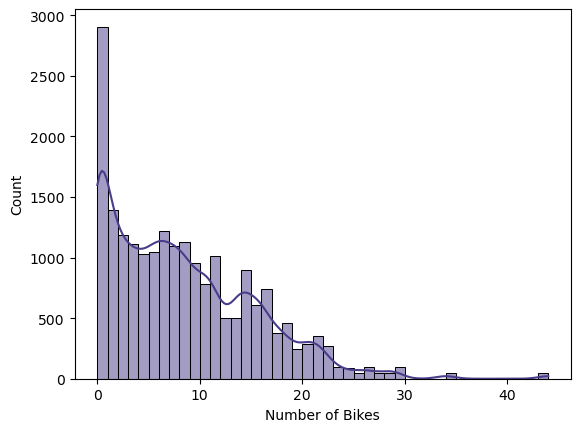

In [17]:
# Evaluate the shape of the distribution using a Histogram
histogram_bikes = sns.histplot(data_cleaned['Number of Bikes'], kde=True, binwidth=1, color='darkslateblue')

# Save plot in images folder to present to stakeholders
plt.savefig('/Users/kthan/Desktop/LHL-Python/Python-Project/images/histogram_bikes.png')

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

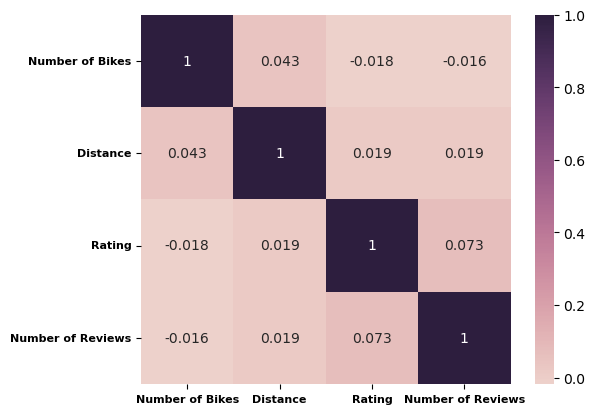

In [10]:
# Discover correlations between the variables using correlation matrix
corrmat = sns.heatmap(data_cleaned.corr(), square=True, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
corrmat.set_xticklabels(corrmat.get_xticklabels(), fontsize=8, weight='bold', rotation=0, horizontalalignment='center')
corrmat.set_yticklabels(corrmat.get_yticklabels(), fontsize=8, weight='bold', rotation=0, horizontalalignment='right')
plt.figure

# Save plot in images folder to present to stakeholders
plt.savefig('/Users/kthan/Desktop/LHL-Python/Python-Project/images/correlation_matrix.png')

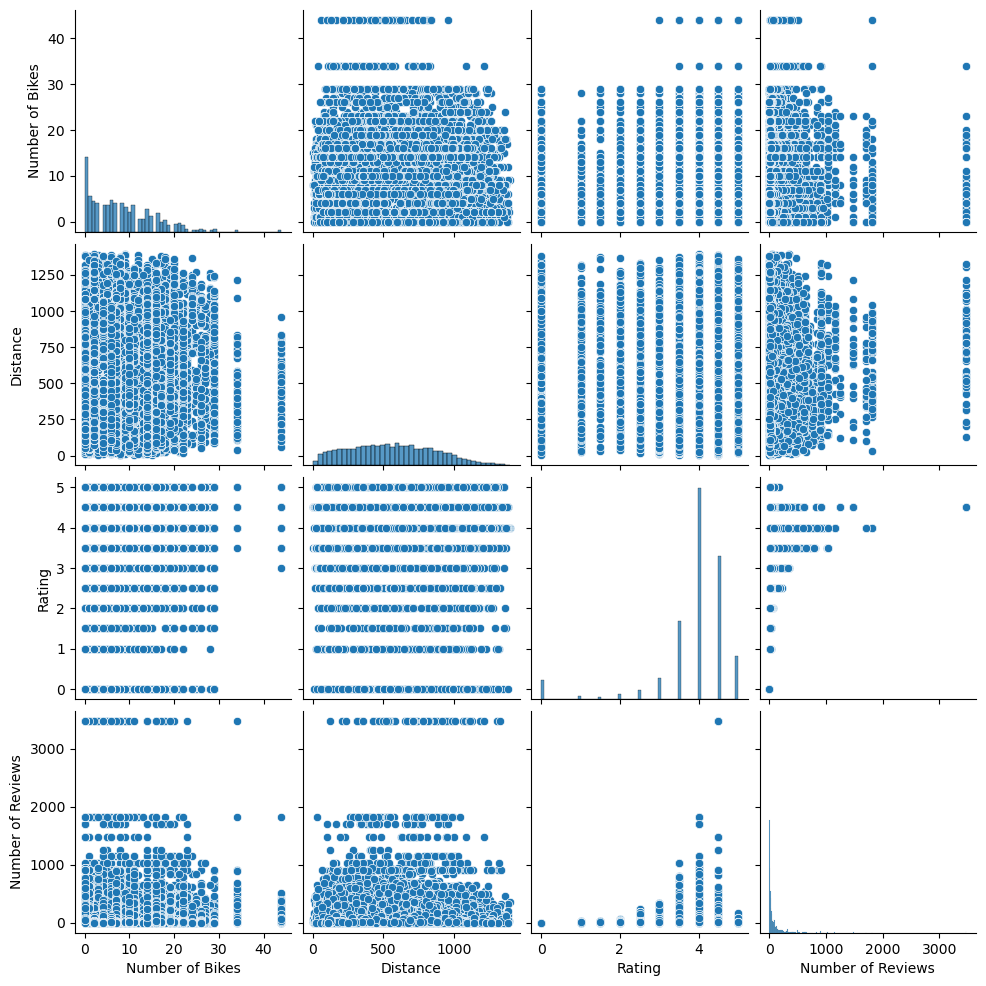

In [142]:
# Use pairplot to investigate the relationships between the numerical variables in the dataset 
pairplot = sns.pairplot(data=data_cleaned)

# Save plot in images folder to present to stakeholders
plt.savefig('/Users/kthan/Desktop/LHL-Python/Python-Project/images/pairplot.png')

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/directory!)

In [12]:
# Before connecting to SQLite, save cleaned merged dataframe as an excel file and store it in the project's data folder
data_cleaned.to_csv('data/merged_data_cleaned.csv', index=False)

In [13]:
# Load the data back into notebook
merged_data = pd.read_csv('/Users/kthan/Desktop/LHL-Python/Python-Project/data/merged_data_cleaned.csv')
len(merged_data) # Match length (20,741) with final output in SQLite database

20741

In [14]:
# Function to open the connection that accepts the path to the SQLite database.
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")
    return connection

In [15]:
# Create a connection to the SQLite database
connection = create_connection("merged_data.sqlite")

Connection to SQLite DB successful


In [16]:
# Insert the data to a new table in the database
merged_data.to_sql('merged_datatable', connection, if_exists='replace')

20741

Look at the data before and after the join to validate your data.

In [17]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [ ]:
# Review all data from table
select_merged_data = "SELECT * FROM merged_datatable"
merged_datatable = execute_read_query(connection, select_merged_data)

# Note: the output is not displayed in order to keep notebook clean
for data in merged_datatable:
    print(data)

In [19]:
# Count the number of rows to ensure it matches the length of the dataframe. Spoiler: Output matches!
select_merged_data = "SELECT COUNT(*) FROM merged_datatable"
merged_datatable = execute_read_query(connection, select_merged_data)

for data in merged_datatable:
    print(data)

(20741,)


In [20]:
# The function below closes the database connection
connection.close()